# **Visualising and Analysing Data**

**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

**Reading the Dataset**

In [2]:
df = pd.read_csv("loan_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Univariate Analysis**

C:\Users\Megalingam\AppData\Local\Temp\ipykernel_21524\3613487252.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'], color='r')
C:\Users\Megalingam\AppData\Local\Temp\ipykernel_21524\3613487252.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit_History'])


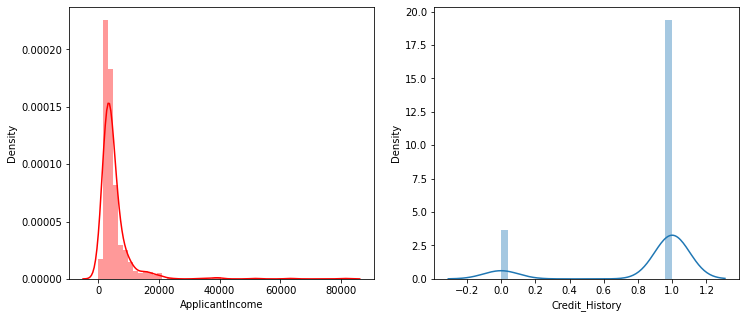

In [3]:
#plotting the using distplot
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['ApplicantIncome'], color='r')
plt.subplot(122)
sns.distplot(df['Credit_History'])
plt.show()

**Bivariate Analysis**

ValueError: Cannot use `hue` without `x` and `y`

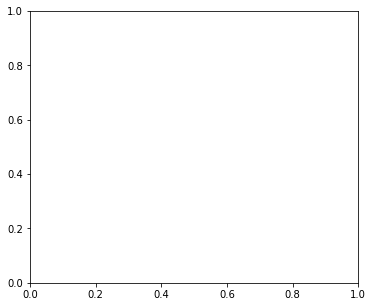

In [4]:
plt.figure(figsize=(20,5)) 
plt.subplot(131)
sns.countplot(df['Married'], hue=df['Gender'])
plt.subplot(132)
sns.countplot(df['Self_Employed'], hue=df['Education'])
plt.subplot(133)
sns.countplot(df['Property_Area'], hue=df['Loan_Amount_Term'])

**Multivariate Analysis**

In [ ]:
sns.swarmplot(df['Gender'], df['ApplicantIncome'], hue = df['Loan_Status'])

TypeError: swarmplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

**Descriptive Analysis**

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# **Data Pre-Processing**

**Checking NULL Values**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
#replacing + with space for filling the nan values
df['Dependents']=df['Dependents'].replace('3+',3)
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount']. mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Handling Categorical Value**

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df.Loan_Status=le.fit_transform(df.Loan_Status)
df.Married=le.fit_transform(df.Married)
df.Education=le.fit_transform(df.Education)
df.Self_Employed=le.fit_transform(df.Self_Employed)
df.Property_Area=le.fit_transform(df.Property_Area)

In [11]:
#changing the datype of each float column to int
df['Gender']=df['Gender'].astype('int64')
df['Married']=df['Married'].astype('int64')
df['Dependents']=df['Dependents'].astype('int64')
df['Self_Employed']=df['Self_Employed'].astype('int64')
df['CoapplicantIncome']=df['CoapplicantIncome'].astype('int64')
df['LoanAmount']=df['LoanAmount'].astype('int64')
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int64')
df['Credit_History']=df['Credit_History'].astype('int64')

**Balancing the dataset**

In [12]:
#Balancing the dfset by using smote
from imblearn.combine import SMOTETomek
smote = SMOTETomek (0.95)
y = df['Loan_Status']
x = df.drop(columns=["Loan_ID",'Loan_Status'], axis=1)
x_bal,y_bal =smote.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    358
0    336
Name: Loan_Status, dtype: int64


c:\Users\Megalingam\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.95 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


**Scaling the Dataset**

In [13]:
sc=StandardScaler()
x_bal_scaled=sc.fit_transform(x_bal)
x_bal_scaled = pd.DataFrame(x_bal,columns=x.columns)

In [14]:
x_bal_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0,120,360,1,2
1,1,1,0,0,1,3000,0,66,360,1,2
2,1,1,0,1,0,2583,2358,120,360,1,2
3,1,0,0,0,0,6000,0,141,360,1,2
4,1,1,2,0,1,5417,4196,267,360,1,2
...,...,...,...,...,...,...,...,...,...,...,...
689,1,1,0,0,0,1958,1309,106,360,0,1
690,1,0,0,0,0,3584,0,99,360,0,1
691,1,0,1,0,0,2302,0,111,371,1,0
692,0,0,1,0,0,4571,0,111,360,0,1


**Processed Final**

In [15]:
final_df=pd.concat([x_bal_scaled,y_bal],axis=1)

In [16]:
final_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,120,360,1,2,1
1,1,1,0,0,1,3000,0,66,360,1,2,1
2,1,1,0,1,0,2583,2358,120,360,1,2,1
3,1,0,0,0,0,6000,0,141,360,1,2,1
4,1,1,2,0,1,5417,4196,267,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
689,1,1,0,0,0,1958,1309,106,360,0,1,0
690,1,0,0,0,0,3584,0,99,360,0,1,0
691,1,0,1,0,0,2302,0,111,371,1,0,0
692,0,0,1,0,0,4571,0,111,360,0,1,0


**Splitting as Training and Testing Data**

In [17]:
train,test = train_test_split(final_df, test_size=0.33, random_state=42)

In [18]:
train.to_csv('train.csv',encoding='utf-8',index=False)
test.to_csv('test.csv',encoding='utf-8',index=False)

In [19]:
x=final_df.drop(["Loan_Status"],axis=1)
y=final_df.Loan_Status
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# **Model Building**

**Decision Tree Model**

In [20]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier() 
    dt.fit(x_train,y_train) 
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***') 
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred)) 
    print('Classification report') 
    print(classification_report (y_test,yPred))
    print("score")
    print(dt.score(x_test,y_test))

**Random Forest Model**

In [21]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier() 
    rf.fit(x_train,y_train) 
    yPred = rf.predict(x_test) 
    print('***RandomForestClassifier***') 
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))
    print("score")
    print(rf.score(x_test,y_test))

**KNN**

In [22]:
def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    yPred = knn.predict(x_test)
    print('***KNeighborsClassifier***') 
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred)) 
    print('Classification report')
    print(classification_report(y_test,yPred))
    print("score")
    print(knn.score(x_test,y_test))

**XG Boost Model**




In [23]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('***Gradient BoostingClassifier***') 
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred)) 
    print('Classification report')
    print(classification_report(y_test,yPred))
    print("score")
    print(xg.score(x_test,y_test))

**Comparing the Models**

In [24]:
decisionTree(x_train, x_test, y_train, y_test)

***DecisionTreeClassifier***
Confusion matrix
[[53 18]
 [12 56]]
Classification report
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        71
           1       0.76      0.82      0.79        68

    accuracy                           0.78       139
   macro avg       0.79      0.79      0.78       139
weighted avg       0.79      0.78      0.78       139

score
0.7841726618705036


In [25]:
randomForest(x_train, x_test, y_train, y_test)

***RandomForestClassifier***
Confusion matrix
[[48 23]
 [ 3 65]]
Classification report
              precision    recall  f1-score   support

           0       0.94      0.68      0.79        71
           1       0.74      0.96      0.83        68

    accuracy                           0.81       139
   macro avg       0.84      0.82      0.81       139
weighted avg       0.84      0.81      0.81       139

score
0.8129496402877698


In [26]:
KNN(x_train, x_test, y_train, y_test)

***KNeighborsClassifier***
Confusion matrix
[[50 21]
 [21 47]]
Classification report
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        71
           1       0.69      0.69      0.69        68

    accuracy                           0.70       139
   macro avg       0.70      0.70      0.70       139
weighted avg       0.70      0.70      0.70       139

score
0.697841726618705


In [27]:
xgboost(x_train, x_test, y_train, y_test)

***Gradient BoostingClassifier***
Confusion matrix
[[46 25]
 [ 4 64]]
Classification report
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        71
           1       0.72      0.94      0.82        68

    accuracy                           0.79       139
   macro avg       0.82      0.79      0.79       139
weighted avg       0.82      0.79      0.79       139

score
0.7913669064748201


**Evaluating Performance of the Model and Saving the model**

In [28]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)
f1_score(yPred,y_test, average='weighted')
cv = cross_val_score(rf,x,y,cv=5)
np.mean(cv)

0.7998331769367115

In [29]:
pickle.dump(rf,open('rdf.pkl','wb'))
pickle.dump(sc,open("scalar.pkl","wb"))

In [30]:
from joblib import Parallel,delayed
import joblib
gh=joblib.load('rdf.pkl')

In [31]:
gh.predict(x_test)

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0])